In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rosenberg = pd.read_parquet('GSE110823/GSM3017261_3K_random_counts.parquet')

In [4]:
from anndata import AnnData
import DCA.api as dca

Using TensorFlow backend.


In [8]:
adata = AnnData(rosenberg.values,
                obs=pd.DataFrame(index=rosenberg.index),
                var=pd.DataFrame(index=rosenberg.columns))

In [10]:
res = dca.autoencode(adata)

### Autoencoder: Successfully preprocessed 26894 genes and 3000 cells.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
count (InputLayer)              (None, 18555)        0                                            
__________________________________________________________________________________________________
enc0 (Dense)                    (None, 64)           1187584     count[0][0]                      
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64)           192         enc0[0][0]                       
__________________________________________________________________________________________________
enc0_act (Activation)           (None, 64)           0           batch_normalization_1[0][0]      
______________________________________

In [17]:
res

AnnData object with n_obs × n_vars = 3000 × 18555 
    obs_keys = ['DCA_split', 'n_counts', 'size_factors']
    var_keys = ['n_counts']
    uns_keys = ['DCA_losses']
    obsm_keys = ['X_dca', 'X_dca_mean', 'X_dca_hidden', 'X_dca_dropout', 'X_dca_dispersion']

In [20]:
si = pd.read_parquet('GSE110823/GSM3017261_3K_random_sample_info.parquet')

In [21]:
for c in si.columns:
    res.obs[c] = si[c]

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [12]:
YY = tsne.fit_transform(res.obsm['X_dca_hidden'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...
[t-SNE] Computed neighbors for 3000 samples in 0.415s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 1.837483
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.190575
[t-SNE] Error after 1000 iterations: 1.379853


In [23]:
res.obs['TSNE_1'] = YY[:, 0]
res.obs['TSNE_2'] = YY[:, 1]

In [22]:
import plotnine as p

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
res.obs_keys()

['DCA_split',
 'n_counts',
 'size_factors',
 'cluster_assignment',
 'sample_type',
 'spinal_cluster_assignment',
 'TSNE_1',
 'TSNE_2']

In [32]:
res.obs['simple_cluster'] = res.obs.cluster_assignment.str.split(' ').str.get(1)

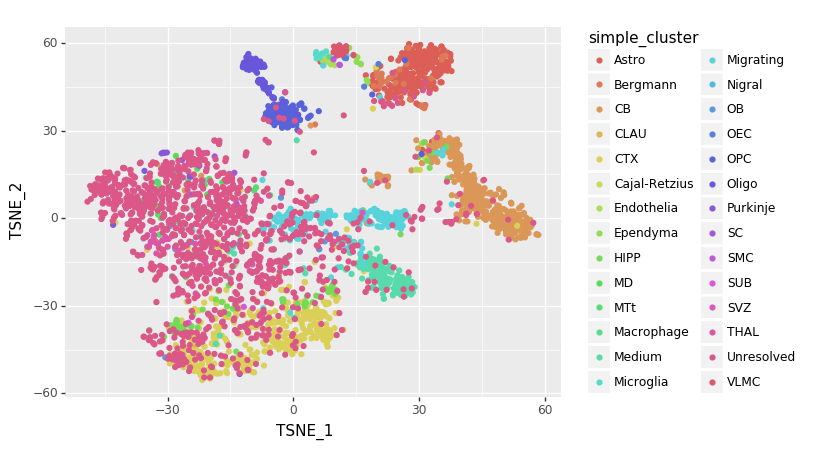

<ggplot: (-9223372036419808333)>

In [33]:
p.qplot('TSNE_1', 'TSNE_2', res.obs, color='simple_cluster')

In [35]:
res.obs[['TSNE_1', 'TSNE_2', 'cluster_assignment']].to_csv('DCA_Rosenberg_results.csv')